# PALMER PENGUINS NOTEBOOK

## 1. Import Libraries

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from graphviz import Source
from IPython.display import display,Markdown
# Dataset loaders
from palmerpenguins import load_penguins 

## 2. Load Dataset + Basic Preprocessing

In [90]:
penguins =load_penguins()
# Remove any rows where the 'species' value is missing (NaN)
penguins_cleaned = penguins.dropna(subset=['species']).copy()
# Separate the dataset into features (X) and target labels (y)
X = penguins_cleaned.drop(columns=['species'])
y = penguins_cleaned['species']
print("Shape after removing missing species:")
print("X shape:", X.shape)
print("y shape:", y.shape)

Shape after removing missing species:
X shape: (344, 7)
y shape: (344,)


## 3. Full Preprocessing with Imputer + OneHotEncoder

In [91]:
def preprocess_features(X):
    # Identify the names of categorical and numerical columns in the dataset
    categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_columns = X.select_dtypes(include=['number']).columns.tolist()
     # For numerical columns: replace missing values with the mean of each column
     # For categorical columns: one-hot encode and handle unknown categories
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), numerical_columns),
            ('cat', OneHotEncoder(handle_unknown='ignore',sparse_output=False), categorical_columns)
        ],
        remainder='passthrough'
    )
    X_processed = preprocessor.fit_transform(X)
    feature_names = numerical_columns.copy()
    if categorical_columns:
        cat_encoded_names= preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
        feature_names.extend(cat_encoded_names)
    return pd.DataFrame(X_processed, columns=feature_names)

## 4. Data Splitting


In [92]:
# Split data into train/test sets with stratified sampling to maintain class distribution
def split_dataset(X,y,test_size):
    return train_test_split(X,y,test_size=test_size,stratify=y,shuffle=True, random_state=42)

## 5. Train Decision Tree

In [93]:
# Create a decision tree classifier with entropy criterion
def train_decision_tree(X_train, y_train, max_depth=None):
    clf = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    return clf

## 6. Visualize Label Distribution

In [94]:
# Function to visualize the label distribution
def plot_distribution(y, title):
    y = pd.Series(y.ravel())  # Ensure 1D
    sns.countplot(x=y)
    plt.title(title)
    plt.xlabel("Species")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

## 7. Visualize Decision Trees with Graphviz

In [95]:
# Export the trained decision tree to DOT format (Graphviz format)
def draw_decision_tree(tree_model, feature_names,class_names):
    dot_data = tree.export_graphviz(
        tree_model,
        out_file=None, 
        feature_names=feature_names,  
        class_names=class_names,  
        filled=True,
        rounded=True,  
        special_characters=True)  
    graph = Source(dot_data)
    display(graph)
    

## 8. Classification Report

In [96]:
def print_classification_report(y_test,y_pred,target_names):
    print(classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names))


## 9. Confusion Matrix

In [97]:
def plot_confusion_matrix(y_test, y_pred,target_names,labels,depth,test_size):
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    figure,axes = plt.subplots(figsize=(8, 8))
    display.plot(ax=axes, cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Confusion Matrix (Depth={depth}, {100 - int(test_size * 100)}/{int(test_size * 100)} Split)")
    plt.grid(False)
    plt.show()

## 10. Max Depth - Accurary

In [98]:
# Print table of relationship between max_depth and accuracy
def print_max_depth_accuracy(max_depths, accuracies):
    df = pd.DataFrame([accuracies],columns=[str(v) if v is not None else 'None' for v in max_depths],index=['Accuracy'])
    df.columns.name = 'max_depth'
    print(df)

# Draw a chart of accuracy by max_depth
def max_depth_accuracy_chart(max_depths,accuracies):
    plot_x = [-1 if v is None else v for v in max_depths]
    labels_x =[str(v) if v is not None else 'None' for v in max_depths]
    plt.figure(figsize=(10, 6))
    plt.plot(plot_x,accuracies,'o-', color='blue')
    plt.title('Decision Tree Accuracy by Maximum Depth')
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.xticks(plot_x, labels_x)
    plt.grid(True)
    plt.show()


## 11. Main

0: Train/Test = 40/60


### Test Size: 0.6

C:\Users\LE THANH VINH\AppData\Local\Temp\ipykernel_15080\2512977432.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = pd.Series(y.ravel())  # Ensure 1D


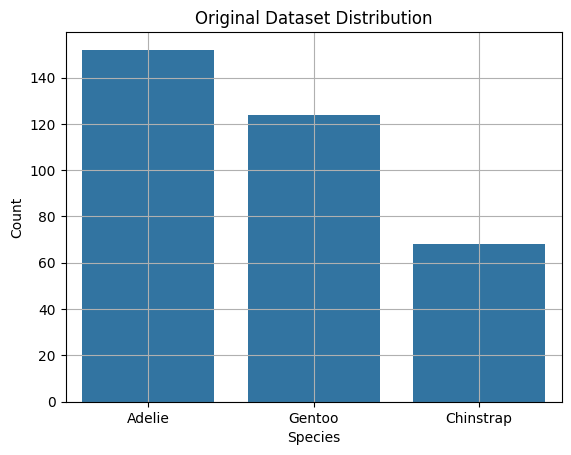

C:\Users\LE THANH VINH\AppData\Local\Temp\ipykernel_15080\2512977432.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = pd.Series(y.ravel())  # Ensure 1D


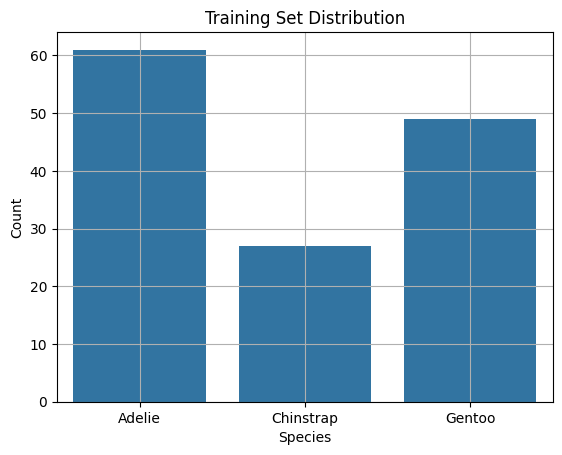

C:\Users\LE THANH VINH\AppData\Local\Temp\ipykernel_15080\2512977432.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = pd.Series(y.ravel())  # Ensure 1D


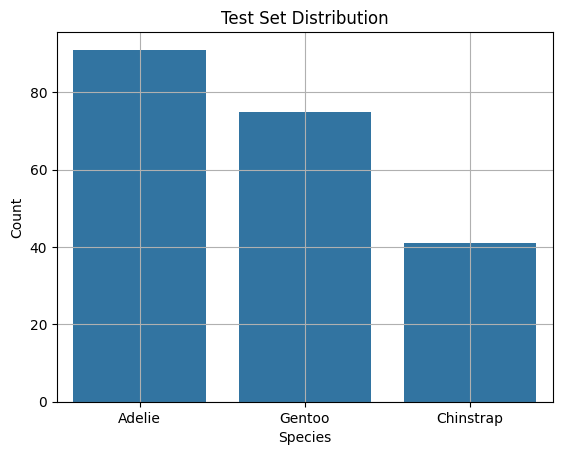

### Decision Tree Visualization


(process:13436): Pango-CRITICAL **: 21:34:19.826: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:13436): Pango-CRITICAL **: 21:34:19.826: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:13436): Pango-CRITICAL **: 21:34:19.826: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:13436): Pango-CRITICAL **: 21:34:19.826: pango_font_description_get_family: assertion 'desc != NULL' failed


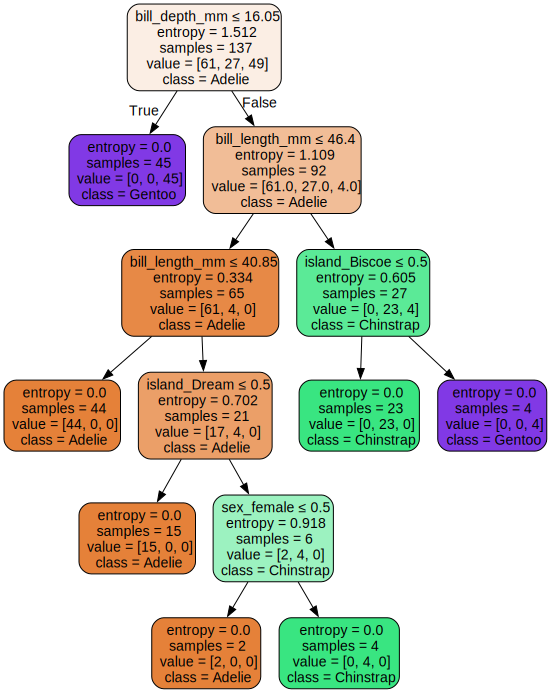

### Classification Report

              precision    recall  f1-score   support

      Adelie       0.97      0.96      0.96        91
   Chinstrap       0.98      1.00      0.99        41
      Gentoo       0.96      0.96      0.96        75

    accuracy                           0.97       207
   macro avg       0.97      0.97      0.97       207
weighted avg       0.97      0.97      0.97       207



### Confusion Matrix

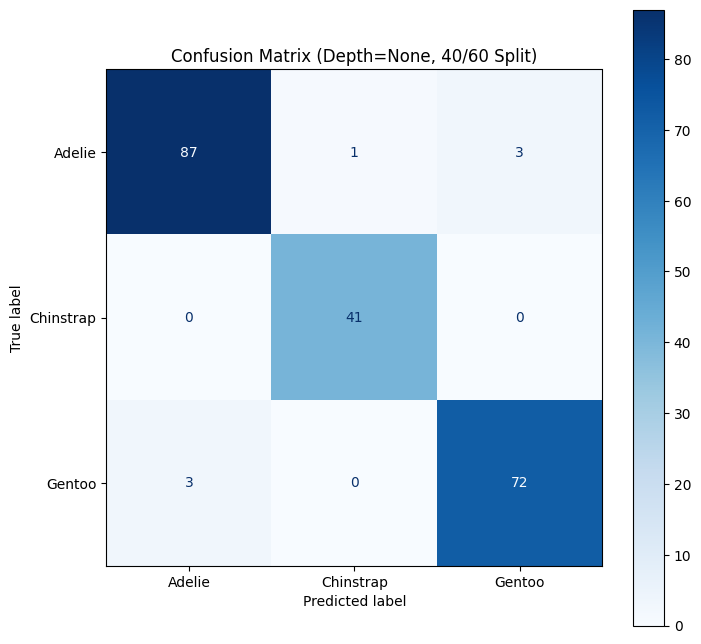

1: Train/Test = 60/40


### Test Size: 0.4

C:\Users\LE THANH VINH\AppData\Local\Temp\ipykernel_15080\2512977432.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = pd.Series(y.ravel())  # Ensure 1D


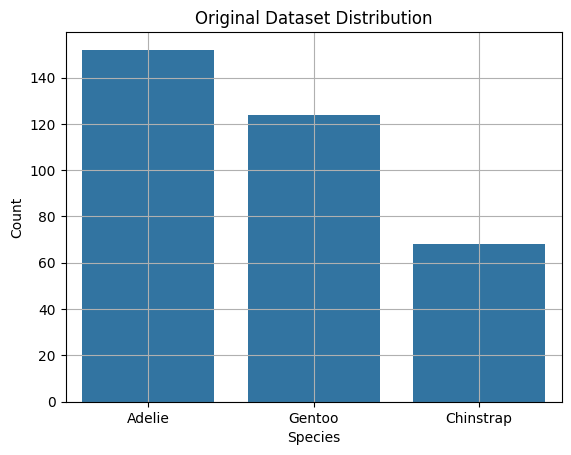

C:\Users\LE THANH VINH\AppData\Local\Temp\ipykernel_15080\2512977432.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = pd.Series(y.ravel())  # Ensure 1D


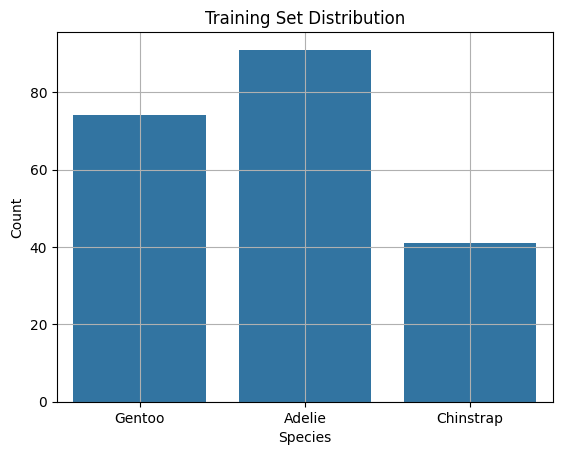

C:\Users\LE THANH VINH\AppData\Local\Temp\ipykernel_15080\2512977432.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = pd.Series(y.ravel())  # Ensure 1D


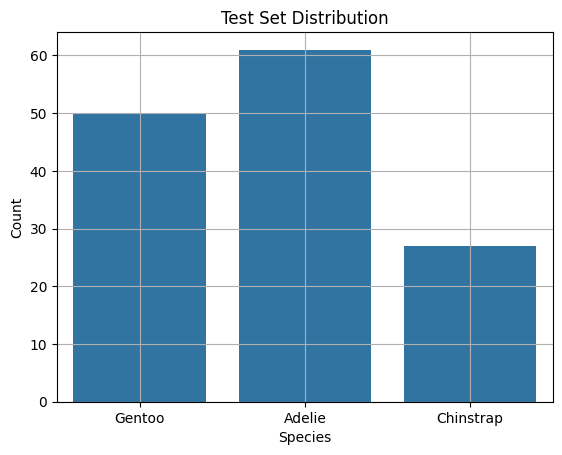

### Decision Tree Visualization


(process:22016): Pango-CRITICAL **: 21:34:20.742: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22016): Pango-CRITICAL **: 21:34:20.742: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22016): Pango-CRITICAL **: 21:34:20.749: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22016): Pango-CRITICAL **: 21:34:20.749: pango_font_description_get_family: assertion 'desc != NULL' failed


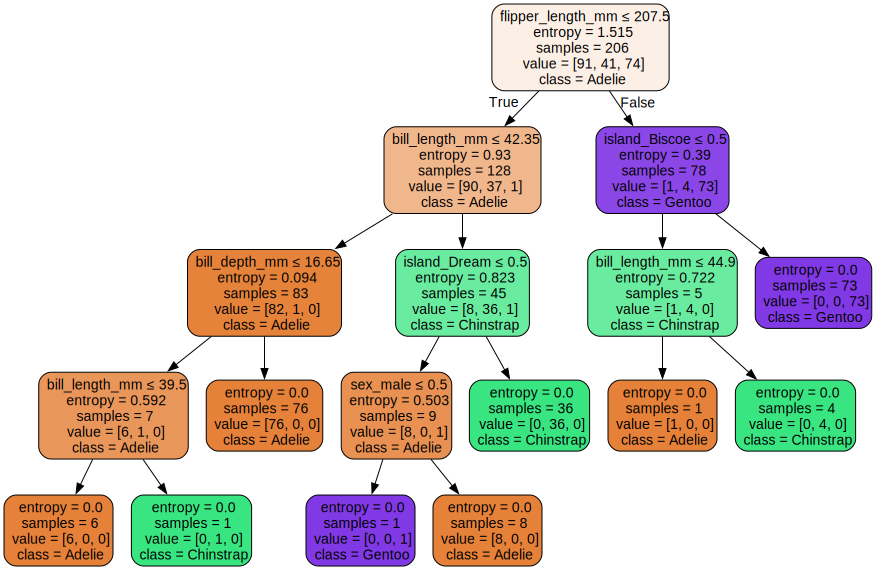

### Classification Report

              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.97        61
   Chinstrap       0.93      1.00      0.96        27
      Gentoo       0.98      1.00      0.99        50

    accuracy                           0.98       138
   macro avg       0.97      0.98      0.98       138
weighted avg       0.98      0.98      0.98       138



### Confusion Matrix

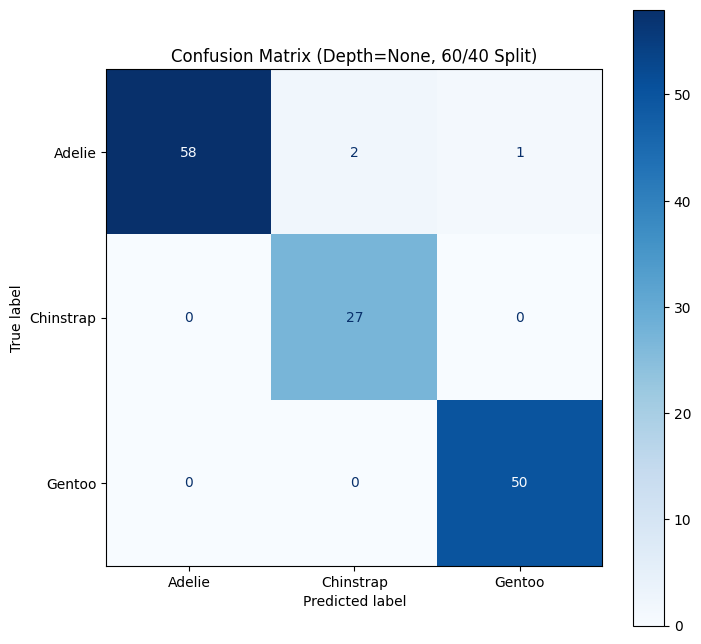

2: Train/Test = 80/20


### Test Size: 0.2

C:\Users\LE THANH VINH\AppData\Local\Temp\ipykernel_15080\2512977432.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = pd.Series(y.ravel())  # Ensure 1D


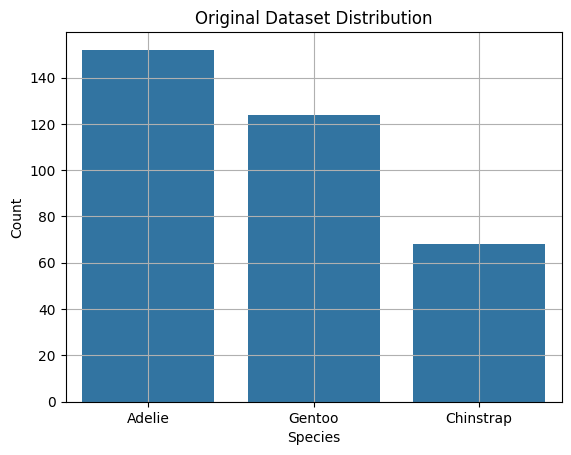

C:\Users\LE THANH VINH\AppData\Local\Temp\ipykernel_15080\2512977432.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = pd.Series(y.ravel())  # Ensure 1D


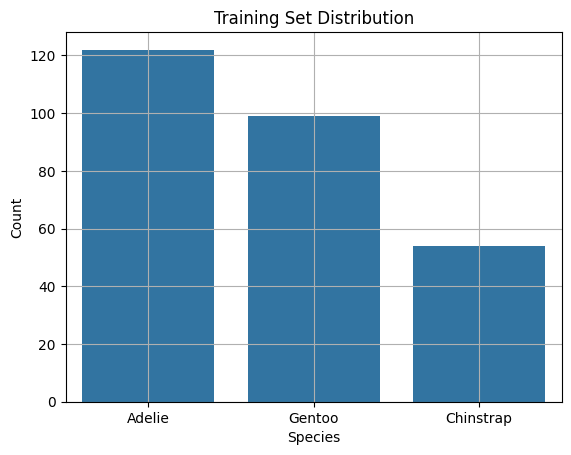

C:\Users\LE THANH VINH\AppData\Local\Temp\ipykernel_15080\2512977432.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = pd.Series(y.ravel())  # Ensure 1D


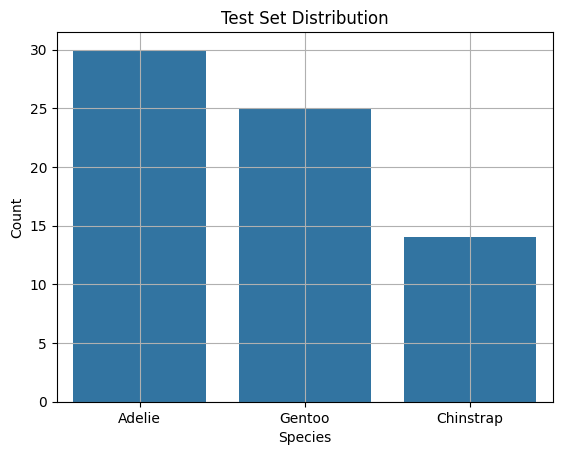

### Decision Tree Visualization


(process:5784): Pango-CRITICAL **: 21:34:21.547: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:5784): Pango-CRITICAL **: 21:34:21.547: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:5784): Pango-CRITICAL **: 21:34:21.547: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:5784): Pango-CRITICAL **: 21:34:21.547: pango_font_description_get_family: assertion 'desc != NULL' failed


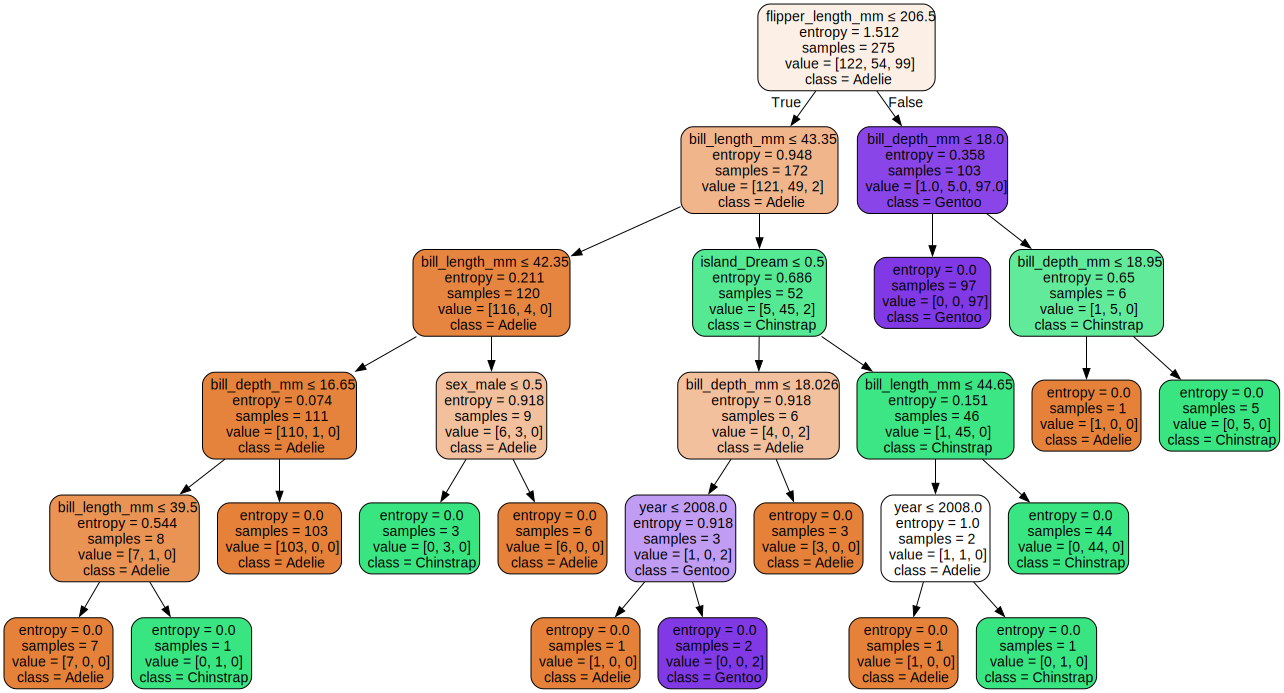

### Classification Report

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       0.96      1.00      0.98        25

    accuracy                           0.99        69
   macro avg       0.99      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69



### Confusion Matrix

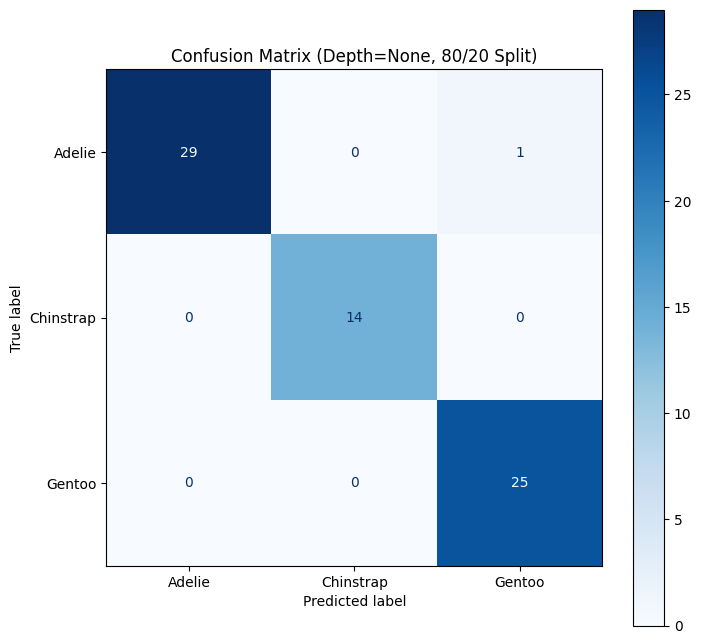

3: Train/Test = 90/10


### Test Size: 0.1

C:\Users\LE THANH VINH\AppData\Local\Temp\ipykernel_15080\2512977432.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = pd.Series(y.ravel())  # Ensure 1D


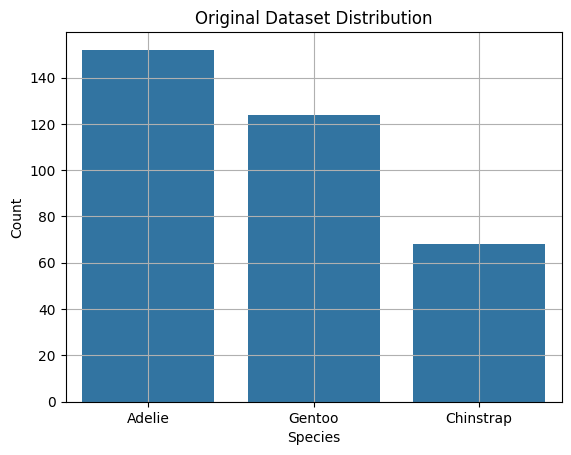

C:\Users\LE THANH VINH\AppData\Local\Temp\ipykernel_15080\2512977432.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = pd.Series(y.ravel())  # Ensure 1D


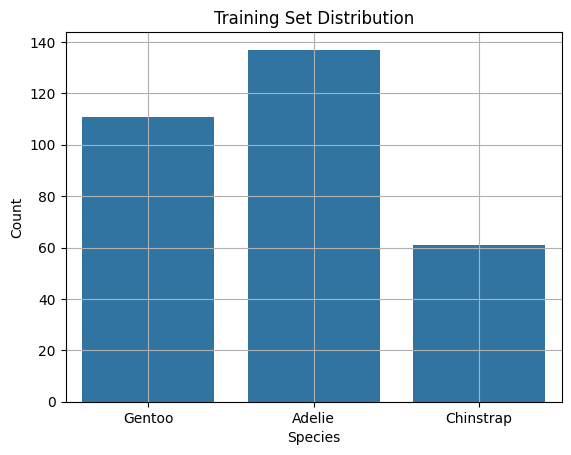

C:\Users\LE THANH VINH\AppData\Local\Temp\ipykernel_15080\2512977432.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = pd.Series(y.ravel())  # Ensure 1D


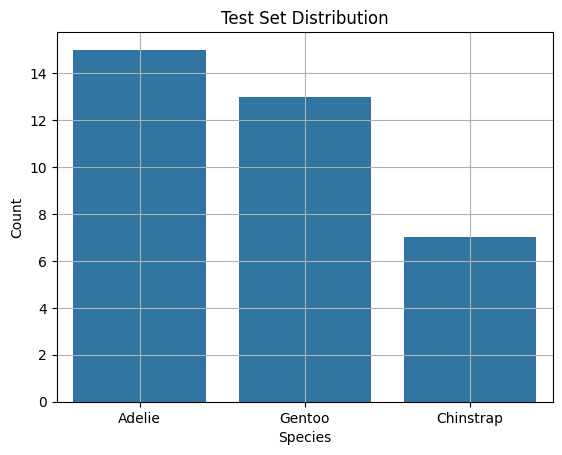

### Decision Tree Visualization


(process:18364): Pango-CRITICAL **: 21:34:22.371: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:18364): Pango-CRITICAL **: 21:34:22.371: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:18364): Pango-CRITICAL **: 21:34:22.371: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:18364): Pango-CRITICAL **: 21:34:22.371: pango_font_description_get_family: assertion 'desc != NULL' failed


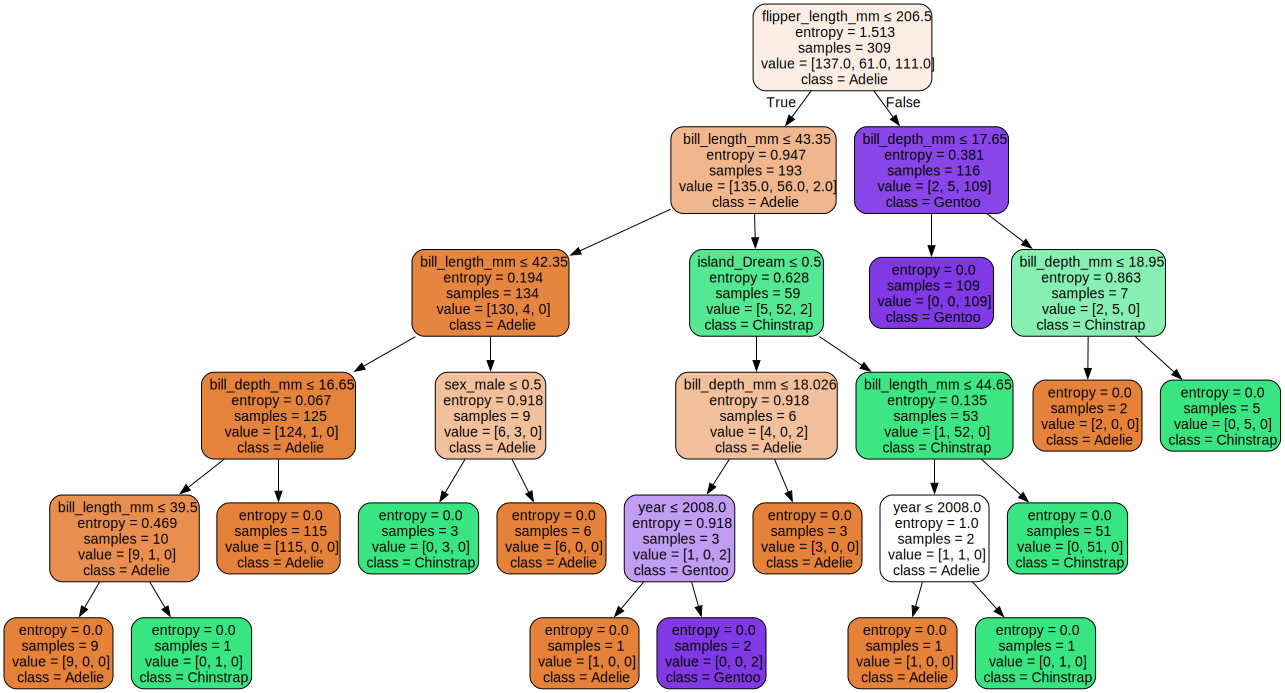

### Classification Report

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        15
   Chinstrap       1.00      1.00      1.00         7
      Gentoo       1.00      1.00      1.00        13

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



### Confusion Matrix

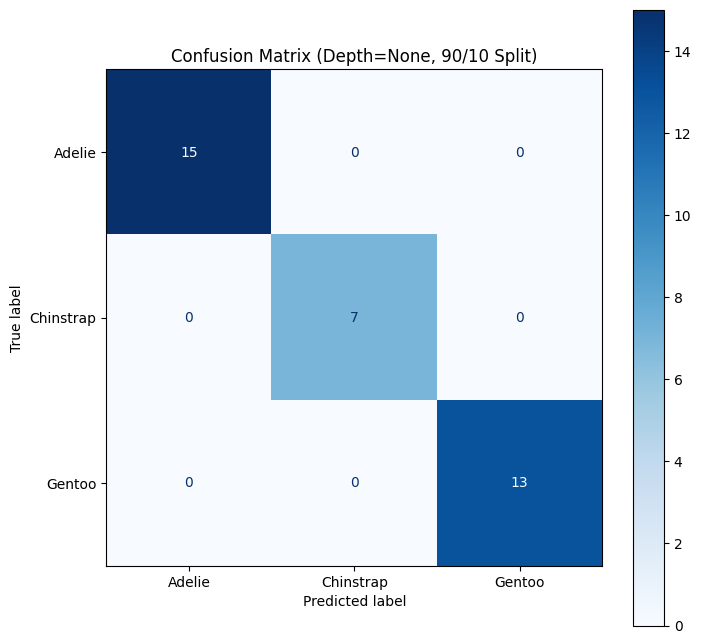

In [99]:
def main(): 
    split_ratios =[0.6, 0.4, 0.2, 0.1]
    X_processed = preprocess_features(X)
    feature_names = X_processed.columns.tolist()
    # Extract feature names from processed dataset for visualization
    target_names = ["Adelie", "Chinstrap", "Gentoo"]
    class_names = [label for label in target_names if label in y.unique()]
    # Filter to get only class names that actually exist in the dataset
    for i in range(0,4):
        print(f"{i}: Train/Test = {100 - int(split_ratios[i] * 100)}/{int(split_ratios[i] * 100)}")
        display(Markdown(f"### Test Size: {split_ratios[i]}"))
        X_train, X_test, y_train, y_test = split_dataset(X_processed, y, split_ratios[i])
        clf = train_decision_tree(X_train, y_train, max_depth=None)
        y_pred = clf.predict(X_test)
        plot_distribution(y, "Original Dataset Distribution")
        plot_distribution(y_train, "Training Set Distribution")
        plot_distribution(y_test, "Test Set Distribution")
        display(Markdown("### Decision Tree Visualization"))
        draw_decision_tree(clf, feature_names, class_names)
        display(Markdown("### Classification Report"))
        print_classification_report(y_test, y_pred,target_names)
        display(Markdown("### Confusion Matrix"))
        plot_confusion_matrix(y_test,y_pred,target_names,labels=class_names,depth=None, test_size=split_ratios[i])
main()